# Exercise 05

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
The project must be carried out in the groups assigned in class.
Use clear and rigorous procedures.
Due date: July 11, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import pystan
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

ERROR:fbprophet.plot:Importing plotly failed. Interactive plots will not work.


## Using the example_retail_sales dataset:
- Standardize the dataset using np.log


In [17]:
births = pd.read_csv('example_retail_sales.csv')
df_sales = pd.DataFrame()
df_sales['ds'] = pd.to_datetime(births['ds'])
df_sales['y'] = births['y']
df_logsales = pd.DataFrame()
df_logsales['ds'] = pd.to_datetime(births['ds'])
df_logsales['y'] = np.log(births['y'])

- Predict the next 6 months of sales

In [4]:
df_sales.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


<AxesSubplot:>

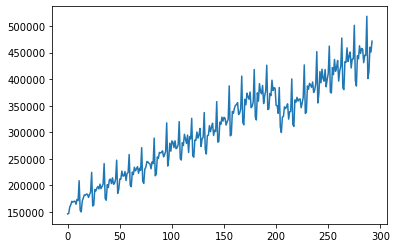

In [5]:
df_sales['y'].plot()

In [6]:
m = Prophet()
m.fit(df_sales)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
df_sales.tail()

,ds,y
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935
292,2016-05-01,471421


In [8]:
future = m.make_future_dataframe(periods=6*30, freq='D')
future.tail()

,ds
468,2016-10-24
469,2016-10-25
470,2016-10-26
471,2016-10-27
472,2016-10-28


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
468,2016-10-24,478033.753984,467915.219818,488675.770374
469,2016-10-25,474969.946280,464802.466116,484454.460504
470,2016-10-26,472324.205776,461528.215494,482630.310834
471,2016-10-27,470199.635396,460674.688405,480393.370491
472,2016-10-28,468687.690476,459738.575522,479517.109018


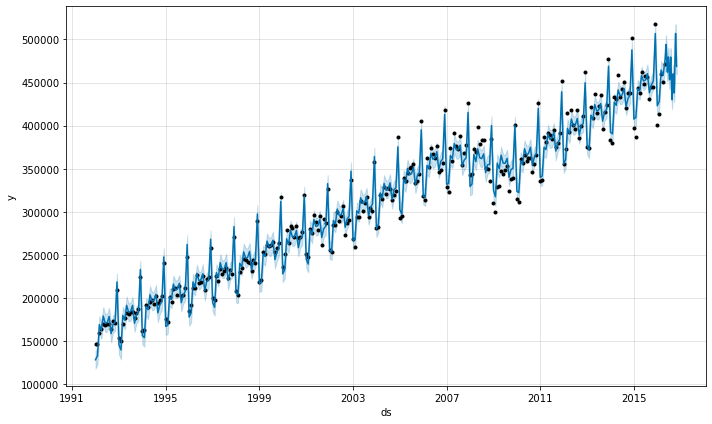

In [10]:
fig1 = m.plot(forecast)

- Using prophet forescast the next 6 months of the sales logarithm


In [19]:
df_logsales.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


<AxesSubplot:>

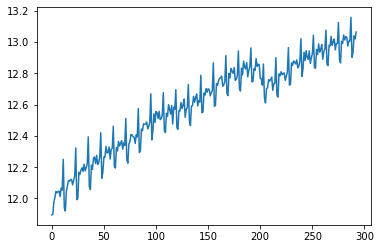

In [18]:
df_logsales['y'].plot()

In [20]:
m2 = Prophet()
m2.fit(df_logsales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
df_logsales.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


In [26]:
future2 = m2.make_future_dataframe(periods=6*30, freq='D')
future2.tail()

,ds
468,2016-10-24
469,2016-10-25
470,2016-10-26
471,2016-10-27
472,2016-10-28


In [27]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
468,2016-10-24,13.083974,13.063095,13.105346
469,2016-10-25,13.079119,13.056648,13.101115
470,2016-10-26,13.074414,13.054031,13.095878
471,2016-10-27,13.069936,13.047891,13.092841
472,2016-10-28,13.065756,13.043978,13.087175


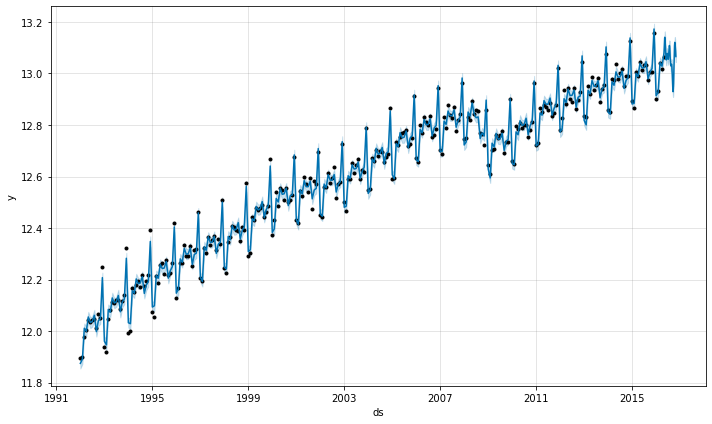

In [28]:
fig1 = m2.plot(forecast2)